## Imports and Data Preprocessing

Import data and do basics of removing extraneous data

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Import Verlander dataset 

verlander_df = pd.read_csv(Path("../resources/verlander_update.csv"))

display(verlander_df.head())

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,des,stand,...,on_1b,outs_when_up,inning,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,"Verlander, Justin",669127,434378,strikeout,swinging_strike,9,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,3,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,called_strike,13,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,1,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,ball,8,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,1,Slider,0,2,Infield shift,Standard


In [3]:
# Clean dataset 

verlander_df = verlander_df.drop(columns=['des',
'at_bat_number', 
'inning', 
'zone', 
'player_name', 
'batter', 
'pitcher', 
'events',
'bb_type',
'hit_location',
'home_team',
'away_team'])

display(verlander_df.head())

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,NaN,NaN,NaN,2,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,NaN,NaN,NaN,2,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,NaN,NaN,NaN,2,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,S,1,0,NaN,NaN,NaN,2,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,B,0,0,NaN,NaN,NaN,2,1,Slider,0,2,Infield shift,Standard


In [4]:
# Encode 1st, 2nd and 3rd bases with 1s and 0s

# Fill NaN to 0 
verlander_df['on_3b'] = verlander_df['on_3b'].fillna(0)
verlander_df['on_2b'] = verlander_df['on_2b'].fillna(0)
verlander_df['on_1b'] = verlander_df['on_1b'].fillna(0)

# Change batter IDs to 1 
verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
verlander_df['on_1b'][verlander_df['on_1b'] > 0.0] = 1.0

display(verlander_df.head())

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,0.0,0.0,0.0,2,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,0.0,0.0,0.0,2,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,0.0,0.0,0.0,2,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,S,1,0,0.0,0.0,0.0,2,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,B,0,0,0.0,0.0,0.0,2,1,Slider,0,2,Infield shift,Standard


In [5]:
# Fill NaN in description column

verlander_df['description'] = verlander_df['description'].fillna('nothing')

## Feature Engineering

In [6]:
# Shift pitches so that model does not know the upcoming pitch 

verlander_df['pitch_name'] = verlander_df['pitch_name'].shift(-1).dropna()
verlander_df['type'] = verlander_df['type'].shift(-1).dropna()

display(verlander_df)

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,0.0,0.0,0.0,2,5,4-Seam Fastball,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,0.0,0.0,0.0,2,4,Slider,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,0.0,0.0,0.0,2,3,4-Seam Fastball,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,B,1,0,0.0,0.0,0.0,2,2,Slider,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,X,0,0,0.0,0.0,0.0,2,1,Slider,0,2,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,FF,4/9/2022,swinging_strike,L,R,S,2,2,0.0,0.0,0.0,0,5,4-Seam Fastball,0,0,Infield shift,Standard
2332,FF,4/9/2022,foul_tip,L,R,B,2,1,0.0,0.0,0.0,0,4,4-Seam Fastball,0,0,Infield shift,Standard
2333,FF,4/9/2022,ball,L,R,S,1,1,0.0,0.0,0.0,0,3,4-Seam Fastball,0,0,Infield shift,Standard
2334,FF,4/9/2022,called_strike,L,R,B,1,0,0.0,0.0,0.0,0,2,4-Seam Fastball,0,0,Infield shift,Standard


In [7]:
# Converting batting score and fielding score to one column.
# Positive number means fielding team is winning and negative number means batting team is winning. 
verlander_df['score_diff'] = verlander_df['fld_score'] - verlander_df['bat_score']


# Drop batting score and fielding score columns now that you have the score differential
verlander_df.drop(columns = ['bat_score', 'fld_score'], inplace=True)

In [8]:
# Feature engineering to count the number of pitches JV has thrown each outing

verlander_df['ones'] = 1
pitch_count_df = verlander_df[['game_date', 'ones']]
pitch_count_df['pitch_count'] = pitch_count_df.groupby(['game_date']).cumcount(ascending = False)
pitch_count_df['pitch_count'] = pitch_count_df['pitch_count'] + 1

verlander_df = pd.concat([verlander_df, pitch_count_df['pitch_count']], join='inner', axis=1)



/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# Feature engineering to change the ball and strike count into one column as a string

verlander_df['count'] = verlander_df['balls'].astype(str) +'-'+ verlander_df['strikes'].astype(str)
verlander_df.drop(columns=['balls', 'strikes'], inplace=True)
verlander_df.head()

,pitch_type,game_date,description,stand,p_throws,type,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,if_fielding_alignment,of_fielding_alignment,score_diff,ones,pitch_count,count
0,SL,9/16/2022,swinging_strike,R,R,S,0.0,0.0,0.0,2,5,4-Seam Fastball,Infield shift,Standard,2,1,79,1-2
1,FF,9/16/2022,foul,R,R,S,0.0,0.0,0.0,2,4,Slider,Infield shift,Standard,2,1,78,1-2
2,SL,9/16/2022,called_strike,R,R,S,0.0,0.0,0.0,2,3,4-Seam Fastball,Infield shift,Standard,2,1,77,1-1
3,FF,9/16/2022,foul,R,R,B,0.0,0.0,0.0,2,2,Slider,Infield shift,Standard,2,1,76,1-0
4,SL,9/16/2022,ball,R,R,X,0.0,0.0,0.0,2,1,Slider,Infield shift,Standard,2,1,75,0-0


## Data Processing 

Prepare data to be fed into model

In [10]:
# Split into X and y 

X = verlander_df.drop(columns=['pitch_type', 'game_date'])
y= verlander_df['pitch_type']

display(y.value_counts)

<bound method IndexOpsMixin.value_counts of 0       SL
1       FF
2       SL
3       FF
4       SL
        ..
2331    FF
2332    FF
2333    FF
2334    FF
2335    FF
Name: pitch_type, Length: 2336, dtype: object>

In [11]:
# Use get_dummies to encode categorical variables 

X = pd.get_dummies(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

display(X.head())
display(dummy_y)

display(X.columns)

# SL = index 3
# CH = index 0
# FF = index 2
# CU = index 1

,on_3b,on_2b,on_1b,outs_when_up,pitch_number,score_diff,ones,pitch_count,description_ball,description_blocked_ball,...,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2
0,0.0,0.0,0.0,2,5,2,1,79,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.0,2,4,2,1,78,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,2,3,2,1,77,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,2,2,2,1,76,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,2,1,2,1,75,1,0,...,0,0,0,0,0,0,0,0,0,0


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

Index(['on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'pitch_number', 'score_diff',
       'ones', 'pitch_count', 'description_ball', 'description_blocked_ball',
       'description_called_strike', 'description_foul',
       'description_foul_bunt', 'description_foul_tip',
       'description_hit_by_pitch', 'description_hit_into_play',
       'description_swinging_strike', 'description_swinging_strike_blocked',
       'stand_L', 'stand_R', 'p_throws_R', 'type_B', 'type_S', 'type_X',
       'pitch_name_4-Seam Fastball', 'pitch_name_Changeup',
       'pitch_name_Curveball', 'pitch_name_Slider',
       'if_fielding_alignment_Infield shift', 'if_fielding_alignment_Standard',
       'if_fielding_alignment_Strategic', 'of_fielding_alignment_Standard',
       'of_fielding_alignment_Strategic', 'count_0-0', 'count_0-1',
       'count_0-2', 'count_1-0', 'count_1-1', 'count_1-2', 'count_2-0',
       'count_2-1', 'count_2-2', 'count_3-0', 'count_3-1', 'count_3-2'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        X, dummy_y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,on_3b,on_2b,on_1b,outs_when_up,pitch_number,score_diff,ones,pitch_count,description_ball,description_blocked_ball,...,count_0-2,count_1-0,count_1-1,count_1-2,count_2-0,count_2-1,count_2-2,count_3-0,count_3-1,count_3-2
1573,0.0,0.0,0.0,0,1,-3,1,28,0,0,...,0,0,0,0,0,0,0,0,0,0
65,0.0,0.0,0.0,0,1,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1251,0.0,0.0,0.0,0,3,5,1,48,0,0,...,1,0,0,0,0,0,0,0,0,0
353,0.0,0.0,0.0,2,4,0,1,72,0,0,...,0,0,0,1,0,0,0,0,0,0
700,0.0,0.0,0.0,0,3,0,1,16,0,0,...,0,0,0,0,1,0,0,0,0,0


## Deep Learning/Neural Network Architecture

Using the method from the module, the following basis is used to design the first iteration of the neural network: 

*the mean of the number of input features and the number of neurons in the output layer ((number of input features + number of neurons in output layer) / 2). Use a number close to this mean for the number of neurons in the first hidden layer. Repeat this pattern for subsequent hidden layers ((number of neurons in the prior hidden layer + number of neurons in output layer) / 2). Softmax is the activation for the output layer that is used for multi-class classification. Categorial cross entropy and predictive model accuracy are respectively the loss functions and metrics used for multi-class classification*

In [14]:
# Initialize the Deep Learning Neural Network model

nn_v0 = Sequential()

2022-11-18 18:18:32.446555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Design the network architecture 

# Define the model - deep neural net
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4:
    if i == 0:
        nn_v0.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = (hidden_nodes_layer+number_output)/2
        nn_v0.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v0.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

display(nn_v0.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1104      
                                                                 
 dense_1 (Dense)             (None, 14)                350       
                                                                 
 dense_2 (Dense)             (None, 9)                 135       
                                                                 
 dense_3 (Dense)             (None, 7)                 70        
                                                                 
 dense_4 (Dense)             (None, 4)                 32        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


None

In [16]:
# Fit the data to the model

model_v0 = nn_v0.fit(X_train, y_train, epochs=100)

Epoch 1/100
59/59 [==============================] - 1s 1ms/step - loss: 1.3668 - accuracy: 0.4454
Epoch 2/100
59/59 [==============================] - 0s 1ms/step - loss: 1.2917 - accuracy: 0.5064
Epoch 3/100
59/59 [==============================] - 0s 1ms/step - loss: 1.1760 - accuracy: 0.5064
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 1.1071 - accuracy: 0.5064
Epoch 5/100
59/59 [==============================] - 0s 1ms/step - loss: 1.0978 - accuracy: 0.5064
Epoch 6/100
59/59 [==============================] - 0s 1ms/step - loss: 1.0841 - accuracy: 0.5064
Epoch 7/100
59/59 [==============================] - 0s 1ms/step - loss: 1.0749 - accuracy: 0.5064
Epoch 8/100
59/59 [==============================] - 0s 1ms/step - loss: 1.0667 - accuracy: 0.5064
Epoch 9/100
59/59 [==============================] - 0s 1ms/step - loss: 1.0599 - accuracy: 0.5048
Epoch 10/100
59/59 [==============================] - 0s 1ms/step - loss: 1.0459 - accuracy: 0.5080
Epoch 11/

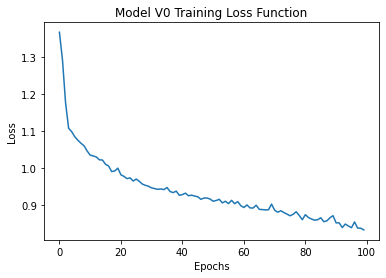

In [17]:
# Plot the loss over epochs

plt.plot(model_v0.history["loss"])
plt.title("Model V0 Training Loss Function")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

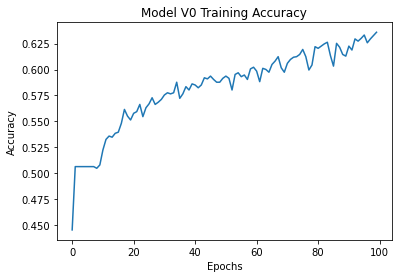

In [18]:
# Plot the accuracy over epochs

plt.plot(model_v0.history["accuracy"])
plt.title("Model V0 Training Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()

In [19]:
# Evaluate model on test set

model_loss, model_accuracy = nn_v0.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - loss: 1.3112 - accuracy: 0.5150 - 180ms/epoch - 12ms/step
Loss: 1.3112486600875854, Accuracy: 0.5149572491645813


In [20]:
# # Have the neural network cast its prediction on what pitch is next

y_pred = nn_v0.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

# Translate target of test set into pitch type

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

# Translate results into pitch type

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# Place results in dataframe

final_results = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results.head())
print(classification_report(final_results['Actual'], final_results['Predictions']))


15/15 [==============================] - 0s 1ms/step


,Predictions,Actual
0,FF,FF
1,FF,FF
2,FF,SL
3,FF,FF
4,SL,SL


              precision    recall  f1-score   support

          CH       0.00      0.00      0.00        15
          CU       0.32      0.27      0.29        86
          FF       0.61      0.68      0.64       234
          SL       0.45      0.44      0.44       133

    accuracy                           0.51       468
   macro avg       0.34      0.35      0.34       468
weighted avg       0.49      0.51      0.50       468



In [21]:
import skopt
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args

In [22]:

dim_learning_rate = Real(low=1e-6, high=1e-1, prior='log-uniform',
                         name='learning_rate')

In [23]:

dim_num_dense_layers = Integer(low=1, high=20, name='num_dense_layers')

In [24]:

dim_num_dense_nodes = Integer(low=5, high=700, name='num_dense_nodes')

In [25]:
dim_activation = Categorical(categories=['relu', 'sigmoid'],
                             name='activation')

In [26]:
dimensions = [dim_learning_rate,
              dim_num_dense_layers,
              dim_num_dense_nodes,
              dim_activation]

In [27]:
#Searched up deafult parameters
default_parameters = [1e-3, 1, 15, 'relu']

In [28]:
def create_model(learning_rate, num_dense_layers,
                 num_dense_nodes, activation):
    
    model = Sequential()

    model.add(InputLayer(input_shape=(X.shape[1])))
    
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1)

        # add dense layer
        model.add(Dense(num_dense_nodes,
                        activation=activation,
                        name=name))

    # use softmax-activation for classification.
    model.add(Dense(dummy_y.shape[1], activation='softmax'))
    
    # Use the Adam method for training the network.
    optimizer = Adam(lr=learning_rate)
    
    #compile the model so it can be trained.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [29]:
validation_data = (X_test, y_test)

In [30]:
#Code found on https://scikit-optimize.github.io/stable/modules/generated/skopt.utils.use_named_args.html
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers,
            num_dense_nodes, activation):
    
    # Create the neural network with these hyper-parameters.
    model = create_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         num_dense_nodes=num_dense_nodes,
                         activation=activation)

    
    # Use Keras to train the model.
    history = model.fit(x= X_train,
                        y= y_train,
                        epochs=3,
                        batch_size=128,
                        validation_data=validation_data)

    # Get the classification accuracy on the validation-set
    # after the last training-epoch.
    accuracy = history.history['val_accuracy'][-1]

    
    # find a set of hyper-parameters with the LOWEST fitness-value.
    # Because we are interested in the HIGHEST classification
    # accuracy, we need to negate this number so it can be minimized.
    return -accuracy
# This function exactly comes from :Hvass-Labs, TensorFlow-Tutorials

In [31]:
#Test with dafault parameters
fitness(x= default_parameters)

Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 11ms/step - loss: 8.2303 - accuracy: 0.2173 - val_loss: 7.4078 - val_accuracy: 0.2457
Epoch 2/3
15/15 [==============================] - 0s 3ms/step - loss: 6.5265 - accuracy: 0.2516 - val_loss: 5.9585 - val_accuracy: 0.2650
Epoch 3/3
15/15 [==============================] - 0s 3ms/step - loss: 5.2945 - accuracy: 0.2971 - val_loss: 4.8314 - val_accuracy: 0.2927


-0.2927350401878357

In [32]:
#Found this on documentation (https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html)
search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # Expected Improvement.
                            n_calls=40,
                            x0=default_parameters)

Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 11ms/step - loss: 17.1644 - accuracy: 0.1916 - val_loss: 16.0063 - val_accuracy: 0.1902
Epoch 2/3
15/15 [==============================] - 0s 3ms/step - loss: 14.3158 - accuracy: 0.2007 - val_loss: 13.1889 - val_accuracy: 0.1966
Epoch 3/3
15/15 [==============================] - 0s 3ms/step - loss: 11.6272 - accuracy: 0.2061 - val_loss: 10.5216 - val_accuracy: 0.1966
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 1.4208 - accuracy: 0.2853 - val_loss: 1.3811 - val_accuracy: 0.2842
Epoch 2/3
15/15 [==============================] - 0s 8ms/step - loss: 1.3405 - accuracy: 0.2853 - val_loss: 1.3103 - val_accuracy: 0.2842
Epoch 3/3
15/15 [==============================] - 0s 8ms/step - loss: 1.2742 - accuracy: 0.2853 - val_loss: 1.2552 - val_accuracy: 0.2842
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 643.8350 - accuracy: 0.3887 - val_loss: 1.2519 - val_accuracy: 0.4209
Epoch 2/3
15/15 [==============================] - 0s 14ms/step - loss: 1.2220 - accuracy: 0.4550 - val_loss: 1.2393 - val_accuracy: 0.4338
Epoch 3/3
15/15 [==============================] - 0s 11ms/step - loss: 1.1221 - accuracy: 0.4823 - val_loss: 1.1811 - val_accuracy: 0.4637
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 41ms/step - loss: 331780.4062 - accuracy: 0.3003 - val_loss: 83.4999 - val_accuracy: 0.0321
Epoch 2/3
15/15 [==============================] - 0s 28ms/step - loss: 21.4943 - accuracy: 0.3539 - val_loss: 11.4526 - val_accuracy: 0.4359
Epoch 3/3
15/15 [==============================] - 1s 39ms/step - loss: 4.8411 - accuracy: 0.3849 - val_loss: 1.1581 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 51ms/step - loss: 41128194048.0000 - accuracy: 0.2736 - val_loss: 7830170.5000 - val_accuracy: 0.2842
Epoch 2/3
15/15 [==============================] - 1s 35ms/step - loss: 1190920576.0000 - accuracy: 0.3078 - val_loss: 1885904640.0000 - val_accuracy: 0.2842
Epoch 3/3
15/15 [==============================] - 1s 53ms/step - loss: 152932736.0000 - accuracy: 0.2821 - val_loss: 15868667904.0000 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 17ms/step - loss: 1.1777 - accuracy: 0.4732 - val_loss: 1.1937 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 6ms/step - loss: 1.1239 - accuracy: 0.5064 - val_loss: 1.1344 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1046 - accuracy: 0.5064 - val_loss: 1.1316 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 3.2321 - accuracy: 0.3945 - val_loss: 2.0116 - val_accuracy: 0.1838
Epoch 2/3
15/15 [==============================] - 0s 11ms/step - loss: 1.4350 - accuracy: 0.3838 - val_loss: 1.2905 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 12ms/step - loss: 1.1541 - accuracy: 0.4711 - val_loss: 1.1688 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 22ms/step - loss: 1.3031 - accuracy: 0.4101 - val_loss: 1.2186 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1283 - accuracy: 0.5064 - val_loss: 1.1419 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1124 - accuracy: 0.5064 - val_loss: 1.1264 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 28ms/step - loss: 1.2640 - accuracy: 0.4277 - val_loss: 1.2079 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 9ms/step - loss: 1.1739 - accuracy: 0.5064 - val_loss: 1.1633 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1336 - accuracy: 0.5064 - val_loss: 1.1423 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 64ms/step - loss: 10.0088 - accuracy: 0.3592 - val_loss: 1.9184 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 1s 51ms/step - loss: 3.7998 - accuracy: 0.4165 - val_loss: 4.7220 - val_accuracy: 0.2842
Epoch 3/3
15/15 [==============================] - 1s 57ms/step - loss: 3.0415 - accuracy: 0.3565 - val_loss: 2.2429 - val_accuracy: 0.2842
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 27ms/step - loss: 1.3091 - accuracy: 0.4101 - val_loss: 1.2429 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 11ms/step - loss: 1.1340 - accuracy: 0.5064 - val_loss: 1.1276 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 13ms/step - loss: 1.1017 - accuracy: 0.5064 - val_loss: 1.1249 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 44ms/step - loss: 19916759498752.0000 - accuracy: 0.2971 - val_loss: 629966976.0000 - val_accuracy: 0.2842
Epoch 2/3
15/15 [==============================] - 0s 32ms/step - loss: 191245856.0000 - accuracy: 0.2998 - val_loss: 73130472.0000 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 1s 35ms/step - loss: 2970696448.0000 - accuracy: 0.3769 - val_loss: 3000414.7500 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 1.2566 - accuracy: 0.4893 - val_loss: 1.1933 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1627 - accuracy: 0.5064 - val_loss: 1.1647 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1397 - accuracy: 0.5064 - val_loss: 1.1341 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 17ms/step - loss: 1.3717 - accuracy: 0.3737 - val_loss: 1.1979 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1394 - accuracy: 0.4663 - val_loss: 1.1557 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1100 - accuracy: 0.5064 - val_loss: 1.1321 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 36ms/step - loss: 396618858496.0000 - accuracy: 0.3169 - val_loss: 44671940.0000 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 23ms/step - loss: 67992768.0000 - accuracy: 0.3544 - val_loss: 2449786.5000 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 23ms/step - loss: 3174624512.0000 - accuracy: 0.3233 - val_loss: 16173631.0000 - val_accuracy: 0.2842
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 1.2579 - accuracy: 0.4855 - val_loss: 1.1796 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1654 - accuracy: 0.5064 - val_loss: 1.1604 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1323 - accuracy: 0.5064 - val_loss: 1.1291 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 31ms/step - loss: 928.4732 - accuracy: 0.3239 - val_loss: 4.1549 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 16ms/step - loss: 1.4061 - accuracy: 0.4872 - val_loss: 1.1265 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 16ms/step - loss: 1.1234 - accuracy: 0.5043 - val_loss: 1.1343 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 47ms/step - loss: 108255494144.0000 - accuracy: 0.2891 - val_loss: 16820810.0000 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 31ms/step - loss: 170234640.0000 - accuracy: 0.3913 - val_loss: 109405648.0000 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 29ms/step - loss: 56660144.0000 - accuracy: 0.2950 - val_loss: 1720804.6250 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 12ms/step - loss: 1.1155 - accuracy: 0.4957 - val_loss: 1.1309 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 4ms/step - loss: 1.0833 - accuracy: 0.5059 - val_loss: 1.0991 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 4ms/step - loss: 1.0612 - accuracy: 0.5080 - val_loss: 1.0978 - val_accuracy: 0.5021
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 16ms/step - loss: 1.2606 - accuracy: 0.4706 - val_loss: 1.2797 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1494 - accuracy: 0.5059 - val_loss: 1.1233 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1087 - accuracy: 0.5059 - val_loss: 1.1264 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 23ms/step - loss: 3.5037 - accuracy: 0.3731 - val_loss: 2.0338 - val_accuracy: 0.2842
Epoch 2/3
15/15 [==============================] - 0s 10ms/step - loss: 1.8742 - accuracy: 0.3448 - val_loss: 1.6044 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 11ms/step - loss: 1.3256 - accuracy: 0.4229 - val_loss: 1.3135 - val_accuracy: 0.2842
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 23ms/step - loss: 1.4869 - accuracy: 0.4143 - val_loss: 1.2392 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 13ms/step - loss: 1.1385 - accuracy: 0.5064 - val_loss: 1.1467 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 22ms/step - loss: 1.1061 - accuracy: 0.5064 - val_loss: 1.1268 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 58ms/step - loss: 3.6671 - accuracy: 0.3608 - val_loss: 2.1898 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 1s 40ms/step - loss: 1.6977 - accuracy: 0.4234 - val_loss: 1.1919 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 1s 39ms/step - loss: 1.2360 - accuracy: 0.4443 - val_loss: 1.2301 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 62ms/step - loss: 1.6653 - accuracy: 0.4106 - val_loss: 1.2131 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 1s 47ms/step - loss: 1.1587 - accuracy: 0.5064 - val_loss: 1.1679 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 1s 47ms/step - loss: 1.1233 - accuracy: 0.4850 - val_loss: 1.1909 - val_accuracy: 0.2842
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 66ms/step - loss: 1.2638 - accuracy: 0.4518 - val_loss: 1.1453 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 1s 50ms/step - loss: 1.1073 - accuracy: 0.5064 - val_loss: 1.1289 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 1s 50ms/step - loss: 1.1056 - accuracy: 0.5064 - val_loss: 1.1304 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 14ms/step - loss: 1.1271 - accuracy: 0.4984 - val_loss: 1.1468 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 3ms/step - loss: 1.1126 - accuracy: 0.5064 - val_loss: 1.1357 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 3ms/step - loss: 1.1036 - accuracy: 0.5064 - val_loss: 1.1278 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 14ms/step - loss: 5.3270 - accuracy: 0.4170 - val_loss: 2.7798 - val_accuracy: 0.2286
Epoch 2/3
15/15 [==============================] - 0s 5ms/step - loss: 1.7861 - accuracy: 0.4004 - val_loss: 1.1508 - val_accuracy: 0.5043
Epoch 3/3
15/15 [==============================] - 0s 5ms/step - loss: 1.1393 - accuracy: 0.4989 - val_loss: 1.0966 - val_accuracy: 0.5107
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 1.2419 - accuracy: 0.5064 - val_loss: 1.1880 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 5ms/step - loss: 1.1526 - accuracy: 0.5064 - val_loss: 1.1444 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 4ms/step - loss: 1.1207 - accuracy: 0.5064 - val_loss: 1.1314 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 12ms/step - loss: 1.2320 - accuracy: 0.4256 - val_loss: 1.1570 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 3ms/step - loss: 1.1148 - accuracy: 0.5064 - val_loss: 1.1280 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.5064 - val_loss: 1.1286 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 13ms/step - loss: 10.0596 - accuracy: 0.3592 - val_loss: 1.2117 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 4ms/step - loss: 1.1256 - accuracy: 0.4909 - val_loss: 1.1118 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 4ms/step - loss: 1.0755 - accuracy: 0.5054 - val_loss: 1.0841 - val_accuracy: 0.5085
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 61ms/step - loss: 1.4215 - accuracy: 0.3833 - val_loss: 1.1629 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 29ms/step - loss: 1.1194 - accuracy: 0.5064 - val_loss: 1.1304 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 29ms/step - loss: 1.1009 - accuracy: 0.5064 - val_loss: 1.1286 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 16ms/step - loss: 1.2637 - accuracy: 0.4031 - val_loss: 1.1692 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 3ms/step - loss: 1.1290 - accuracy: 0.5064 - val_loss: 1.1318 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 3ms/step - loss: 1.1052 - accuracy: 0.5064 - val_loss: 1.1212 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 25ms/step - loss: 1.8797 - accuracy: 0.3774 - val_loss: 1.6892 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 14ms/step - loss: 1.4233 - accuracy: 0.4647 - val_loss: 1.3725 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 14ms/step - loss: 1.1566 - accuracy: 0.5064 - val_loss: 1.1721 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 26ms/step - loss: 2.5361 - accuracy: 0.3860 - val_loss: 1.4239 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 16ms/step - loss: 1.1959 - accuracy: 0.4615 - val_loss: 1.1743 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 16ms/step - loss: 1.1190 - accuracy: 0.4861 - val_loss: 1.1345 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 24ms/step - loss: 1.2538 - accuracy: 0.4406 - val_loss: 1.1548 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 10ms/step - loss: 1.1134 - accuracy: 0.5064 - val_loss: 1.1254 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 10ms/step - loss: 1.0993 - accuracy: 0.5064 - val_loss: 1.1422 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 55ms/step - loss: 1.1516 - accuracy: 0.4925 - val_loss: 1.2032 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 1s 39ms/step - loss: 1.1270 - accuracy: 0.5064 - val_loss: 1.1406 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 1s 39ms/step - loss: 1.1033 - accuracy: 0.5064 - val_loss: 1.1329 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 1.2134 - accuracy: 0.4770 - val_loss: 1.1987 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 0s 8ms/step - loss: 1.1494 - accuracy: 0.5064 - val_loss: 1.1412 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 1.1240 - accuracy: 0.5064 - val_loss: 1.1355 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 56ms/step - loss: 1.2583 - accuracy: 0.4657 - val_loss: 1.1644 - val_accuracy: 0.5000
Epoch 2/3
15/15 [==============================] - 1s 43ms/step - loss: 1.1308 - accuracy: 0.4898 - val_loss: 1.1392 - val_accuracy: 0.5000
Epoch 3/3
15/15 [==============================] - 1s 44ms/step - loss: 1.1034 - accuracy: 0.5064 - val_loss: 1.1273 - val_accuracy: 0.5000
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 11ms/step - loss: 2.1176 - accuracy: 0.4941 - val_loss: 1.6405 - val_accuracy: 0.4893
Epoch 2/3
15/15 [==============================] - 0s 3ms/step - loss: 1.3583 - accuracy: 0.4636 - val_loss: 1.3530 - val_accuracy: 0.3697
Epoch 3/3
15/15 [==============================] - 0s 3ms/step - loss: 1.2961 - accuracy: 0.3849 - val_loss: 1.2844 - val_accuracy: 0.4573
Epoch 1/3


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 16ms/step - loss: 2.2733 - accuracy: 0.1863 - val_loss: 2.2761 - val_accuracy: 0.1838
Epoch 2/3
15/15 [==============================] - 0s 6ms/step - loss: 2.2184 - accuracy: 0.1863 - val_loss: 2.2200 - val_accuracy: 0.1838
Epoch 3/3
15/15 [==============================] - 0s 6ms/step - loss: 2.1641 - accuracy: 0.1863 - val_loss: 2.1648 - val_accuracy: 0.1838


In [33]:
search_result.x

[0.002167385413264583, 2, 541, 'relu']

In [34]:
optimal_paramaters = search_result.x

In [35]:
# use hyper-parameters from optimization
learning_rate = optimal_paramaters[0]
num_layers = optimal_paramaters[1]
num_nodes = optimal_paramaters[2]
activation = optimal_paramaters[3]

In [36]:
#Code found on https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
model_1 = Sequential()
model_1.add(InputLayer(input_shape=(X.shape[1])))
model_1.add(Dense(num_nodes, activation=activation, kernel_initializer='random_normal'))
model_1.add(Dense(dummy_y.shape[1], activation='softmax', kernel_initializer='random_normal'))

optimizer = Adam(lr=learning_rate)
    
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=['accuracy'])


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=1, mode='auto', restore_best_weights=True)

histories = model_1.fit(X_train,y_train, validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=100)


Epoch 1/100


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


59/59 - 1s - loss: 1.3282 - accuracy: 0.4566 - val_loss: 1.0703 - val_accuracy: 0.5278 - 505ms/epoch - 9ms/step
Epoch 2/100
59/59 - 0s - loss: 1.0413 - accuracy: 0.5369 - val_loss: 1.0790 - val_accuracy: 0.5513 - 92ms/epoch - 2ms/step
Epoch 3/100
59/59 - 0s - loss: 1.0607 - accuracy: 0.5375 - val_loss: 1.0826 - val_accuracy: 0.5427 - 90ms/epoch - 2ms/step
Epoch 4/100
59/59 - 0s - loss: 0.9987 - accuracy: 0.5525 - val_loss: 1.0841 - val_accuracy: 0.5363 - 90ms/epoch - 2ms/step
Epoch 5/100
59/59 - 0s - loss: 1.0168 - accuracy: 0.5455 - val_loss: 1.1305 - val_accuracy: 0.4744 - 93ms/epoch - 2ms/step
Epoch 6/100
59/59 - 0s - loss: 1.0348 - accuracy: 0.5294 - val_loss: 1.0525 - val_accuracy: 0.5406 - 92ms/epoch - 2ms/step
Epoch 7/100
59/59 - 0s - loss: 1.0182 - accuracy: 0.5391 - val_loss: 1.0408 - val_accuracy: 0.5214 - 90ms/epoch - 2ms/step
Epoch 8/100
59/59 - 0s - loss: 0.9828 - accuracy: 0.5546 - val_loss: 1.0204 - val_accuracy: 0.5449 - 94ms/epoch - 2ms/step
Epoch 9/100
59/59 - 0s - lo

## Field Testing

Justin Verlander pitched against the Arizona Diamondbacks on the evening of September 28, 2022 at home. The data from that game was extracted from Baseball Savant and used to test the 4 models above

In [37]:
field_df = pd.read_csv(Path("../resources/field_test_data.csv"))

field_df = field_df.loc[:,        ['pitch_type',
                                 'pitch_name',
                                   'game_date',
                                   'description',
                                #    'zone',
                                   'stand',
                                   'p_throws',
                                   'type',
                                   'balls',
                                   'strikes',
                                   'on_3b',
                                   'on_2b',
                                   'on_1b',
                                   'outs_when_up',
                                   'pitch_number',
                                   'bat_score',
                                   'fld_score',
                                   'if_fielding_alignment',
                                   'of_fielding_alignment'
                                  ]]

display(verlander_df.columns)

Index(['pitch_type', 'game_date', 'description', 'stand', 'p_throws', 'type',
       'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'pitch_number', 'pitch_name',
       'if_fielding_alignment', 'of_fielding_alignment', 'score_diff', 'ones',
       'pitch_count', 'count'],
      dtype='object')

## Feature Engineering

In [38]:
# Shift pitches so that model does not know the upcoming pitch 

field_df['pitch_name'] = field_df['pitch_name'].shift(-1).dropna()
field_df['type'] = field_df['type'].shift(-1).dropna()

display(field_df)

,pitch_type,pitch_name,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,4-Seam Fastball,2022-09-28,swinging_strike,L,R,S,1,2,682998.0,608348.0,NaN,2,4,2,2,Infield shift,Standard
1,FF,Slider,2022-09-28,swinging_strike,L,R,B,1,1,682998.0,NaN,608348.0,2,3,2,2,Infield shift,Standard
2,SL,Slider,2022-09-28,ball,L,R,S,0,1,682998.0,NaN,608348.0,2,2,2,2,Infield shift,Standard
3,SL,Curveball,2022-09-28,foul,L,R,X,0,0,682998.0,NaN,608348.0,2,1,2,2,Infield shift,Standard
4,CU,4-Seam Fastball,2022-09-28,hit_into_play,L,R,S,0,2,682998.0,NaN,608348.0,1,3,2,2,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,FF,Slider,2022-09-28,hit_into_play,L,R,B,2,2,NaN,NaN,NaN,0,5,0,0,Infield shift,Standard
97,SL,4-Seam Fastball,2022-09-28,ball,L,R,S,1,2,NaN,NaN,NaN,0,4,0,0,Infield shift,Standard
98,FF,4-Seam Fastball,2022-09-28,foul,L,R,S,1,1,NaN,NaN,NaN,0,3,0,0,Infield shift,Standard
99,FF,4-Seam Fastball,2022-09-28,foul,L,R,B,1,0,NaN,NaN,NaN,0,2,0,0,Infield shift,Standard


In [39]:
# Converting batting score and fielding score to one column.
# Positive number means fielding team is winning and negative number means batting team is winning. 
field_df['score_diff'] = field_df['fld_score'] - field_df['bat_score']


# Drop batting score and fielding score columns now that you have the score differential
field_df.drop(columns = ['bat_score', 'fld_score'], inplace=True)

In [40]:
# Feature engineering to count the number of pitches JV has thrown each outing

field_df['ones'] = 1
pitch_count_df = field_df[['game_date', 'ones']]
pitch_count_df['pitch_count'] = pitch_count_df.groupby(['game_date']).cumcount(ascending = False)
pitch_count_df['pitch_count'] = pitch_count_df['pitch_count'] + 1

field_df = pd.concat([field_df, pitch_count_df['pitch_count']], join='inner', axis=1)

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# Feature engineering to change the ball and strike count into one column as a string

field_df['count'] = field_df['balls'].astype(str) +'-'+ field_df['strikes'].astype(str)
field_df.drop(columns=['balls', 'strikes'], inplace=True)
field_df.head()

,pitch_type,pitch_name,game_date,description,stand,p_throws,type,on_3b,on_2b,on_1b,outs_when_up,pitch_number,if_fielding_alignment,of_fielding_alignment,score_diff,ones,pitch_count,count
0,FF,4-Seam Fastball,2022-09-28,swinging_strike,L,R,S,682998.0,608348.0,NaN,2,4,Infield shift,Standard,0,1,101,1-2
1,FF,Slider,2022-09-28,swinging_strike,L,R,B,682998.0,NaN,608348.0,2,3,Infield shift,Standard,0,1,100,1-1
2,SL,Slider,2022-09-28,ball,L,R,S,682998.0,NaN,608348.0,2,2,Infield shift,Standard,0,1,99,0-1
3,SL,Curveball,2022-09-28,foul,L,R,X,682998.0,NaN,608348.0,2,1,Infield shift,Standard,0,1,98,0-0
4,CU,4-Seam Fastball,2022-09-28,hit_into_play,L,R,S,682998.0,NaN,608348.0,1,3,Infield shift,Standard,0,1,97,0-2


In [42]:
# Encode 1st, 2nd and 3rd bases with 1s and 0s

# Fill NaN to 0 
field_df['on_3b'] = field_df['on_3b'].fillna(0)
field_df['on_2b'] = field_df['on_2b'].fillna(0)
field_df['on_1b'] = field_df['on_1b'].fillna(0)

# Change batter IDs to 1 
field_df['on_3b'][field_df['on_3b'] > 0.0] = 1.0
field_df['on_2b'][field_df['on_2b'] > 0.0] = 1.0
field_df['on_1b'][field_df['on_1b'] > 0.0] = 1.0

display(field_df.head())

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,pitch_type,pitch_name,game_date,description,stand,p_throws,type,on_3b,on_2b,on_1b,outs_when_up,pitch_number,if_fielding_alignment,of_fielding_alignment,score_diff,ones,pitch_count,count
0,FF,4-Seam Fastball,2022-09-28,swinging_strike,L,R,S,1.0,1.0,0.0,2,4,Infield shift,Standard,0,1,101,1-2
1,FF,Slider,2022-09-28,swinging_strike,L,R,B,1.0,0.0,1.0,2,3,Infield shift,Standard,0,1,100,1-1
2,SL,Slider,2022-09-28,ball,L,R,S,1.0,0.0,1.0,2,2,Infield shift,Standard,0,1,99,0-1
3,SL,Curveball,2022-09-28,foul,L,R,X,1.0,0.0,1.0,2,1,Infield shift,Standard,0,1,98,0-0
4,CU,4-Seam Fastball,2022-09-28,hit_into_play,L,R,S,1.0,0.0,1.0,1,3,Infield shift,Standard,0,1,97,0-2


In [43]:
# Split into X and y 

X_real_testing = field_df.drop(columns=['pitch_type', 'game_date'])
y_real_testing = field_df['pitch_type']


In [44]:
# Use get_dummies to encode categorical variables 

X_real_testing = pd.get_dummies(X_real_testing)

encoder = LabelEncoder()
encoder.fit(y_real_testing)
encoded_y_real = encoder.transform(y_real_testing)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_real = np_utils.to_categorical(encoded_y_real)

# if a parameter is not present in the game data, put in a column of 0s
parameters_list = {
    'stand_L',
    'stand_R',
    'if_fielding_alignment_Infield shift',
    'if_fielding_alignment_Standard',
    'if_fielding_alignment_Strategic',
    'of_fielding_alignment_Standard',
    'of_fielding_alignment_Strategic',
    'description_foul_bunt',
    'description_blocked_ball'
}
for string in parameters_list:
    if string not in X_real_testing:
        X_real_testing[string] = 0

display(X_real_testing.columns)

Index(['on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'pitch_number', 'score_diff',
       'ones', 'pitch_count', 'pitch_name_4-Seam Fastball',
       'pitch_name_Changeup', 'pitch_name_Curveball', 'pitch_name_Slider',
       'description_ball', 'description_called_strike', 'description_foul',
       'description_foul_tip', 'description_hit_by_pitch',
       'description_hit_into_play', 'description_swinging_strike',
       'description_swinging_strike_blocked', 'stand_L', 'stand_R',
       'p_throws_R', 'type_B', 'type_S', 'type_X',
       'if_fielding_alignment_Infield shift', 'if_fielding_alignment_Standard',
       'if_fielding_alignment_Strategic', 'of_fielding_alignment_Standard',
       'count_0-0', 'count_0-1', 'count_0-2', 'count_1-0', 'count_1-1',
       'count_1-2', 'count_2-0', 'count_2-1', 'count_2-2', 'count_3-0',
       'count_3-1', 'count_3-2', 'description_foul_bunt',
       'description_blocked_ball', 'of_fielding_alignment_Strategic'],
      dtype='object')

In [45]:
# Evaluate model 1 on test set

model_loss, model_accuracy = nn_v0.evaluate(
    X_real_testing, dummy_y_real, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 1.5997 - accuracy: 0.4059 - 20ms/epoch - 5ms/step
Loss: 1.5997234582901, Accuracy: 0.40594059228897095


In [46]:
model_loss, model_accuracy = model_1.evaluate(
    X_real_testing, dummy_y_real, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 1.2381 - accuracy: 0.4455 - 22ms/epoch - 5ms/step
Loss: 1.2381399869918823, Accuracy: 0.4455445408821106


In [47]:
# # Have the neural network cast its prediction on what pitch is next

y_pred_v0 = nn_v0.predict(X_real_testing)

y_pred_v2 = model_1.predict(X_real_testing)

pred_final_v0 = np.argmax(y_pred_v0, axis=1)

pred_final_v2 = np.argmax(y_pred_v2, axis=1)


# Translate target of test set into pitch type

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

# Place results in dataframe

final_results_real = pd.DataFrame()

# Translate results into pitch type

for arrays in [pred_final_v0, pred_final_v2]:
    y_pred_converted = []
    for numbers in arrays:
        if numbers == 0:
            y_pred_converted.append('CH')
        elif numbers == 1:
            y_pred_converted.append('CU')
        elif numbers == 2:
            y_pred_converted.append('FF')
        else: 
            y_pred_converted.append('SL')
    y_pred_series = pd.DataFrame(y_pred_converted)
    final_results_real = pd.concat([final_results_real, y_pred_series], axis=1)

final_results_real = pd.concat([final_results_real, y_real_testing], axis=1)
final_results_real.columns = ['Model 1 (v0) Pred', 'Model 3 (v2) Pred', 'Actual']

display(final_results_real)
print(classification_report(final_results_real['Actual'], final_results_real['Model 1 (v0) Pred']))

print(classification_report(final_results_real['Actual'], final_results_real['Model 3 (v2) Pred']))

4/4 [==============================] - 0s 1ms/step


,Model 1 (v0) Pred,Model 3 (v2) Pred,Actual
0,SL,FF,FF
1,FF,CU,FF
2,FF,FF,SL
3,SL,CU,SL
4,CU,CU,CU
...,...,...,...
96,SL,SL,FF
97,SL,FF,SL
98,SL,FF,FF
99,FF,FF,FF


              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.17      0.19      0.18        21
          FF       0.53      0.57      0.55        49
          SL       0.36      0.31      0.33        29

    accuracy                           0.41       101
   macro avg       0.27      0.27      0.27       101
weighted avg       0.40      0.41      0.40       101

              precision    recall  f1-score   support

          CH       0.00      0.00      0.00         2
          CU       0.19      0.19      0.19        21
          FF       0.53      0.76      0.62        49
          SL       0.40      0.14      0.21        29

    accuracy                           0.45       101
   macro avg       0.28      0.27      0.25       101
weighted avg       0.41      0.45      0.40       101



/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dev/lib/